In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kagglexfellowship/kagglex-cohort4/sample_submission.csv
/kaggle/input/kagglexfellowship/kagglex-cohort4/train.csv
/kaggle/input/kagglexfellowship/kagglex-cohort4/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/kagglexfellowship/kagglex-cohort4/train.csv')
test=pd.read_csv('/kaggle/input/kagglexfellowship/kagglex-cohort4/test.csv')

In [4]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [6]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [7]:
df['brand'].value_counts()

brand
BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Porsche          2627
Toyota           2315
Lexus            2257
Jeep             2247
Land             1995
Cadillac         1565
Nissan           1252
GMC              1076
Dodge            1011
RAM               966
INFINITI          957
Lincoln           767
Mazda             748
Subaru            739
Hyundai           694
Jaguar            661
Volkswagen        628
Honda             624
Acura             580
Kia               526
Volvo             452
MINI              364
Maserati          293
Bentley           284
Chrysler          258
Genesis           249
Buick             228
Mitsubishi        182
Hummer            176
Pontiac           149
Alfa              144
Rolls-Royce       142
Lamborghini       122
Tesla             110
Ferrari            87
Saturn             58
Scion              53
Aston              50
McLaren            43
Rivian             27
Merc

In [8]:
df.loc[df['brand']=='BMW','brand_country']='Germany'
df.loc[df['brand']=='Ford','brand_country']='United States'
df.loc[df['brand']=='Mercedes-Benz','brand_country']='Germany'
df.loc[df['brand']=='Chevrolet','brand_country']='United States'
df.loc[df['brand']=='Audi','brand_country']='Germany'
df.loc[df['brand']=='Porsche','brand_country']='Germany'
df.loc[df['brand']=='Toyota','brand_country']='Japan'
df.loc[df['brand']=='Lexus','brand_country']='Japan'
df.loc[df['brand']=='Jeep','brand_country']='United States'
df.loc[df['brand']=='Land','brand_country']='United Kingdom'
df.loc[df['brand']=='Cadillac','brand_country']='United States'
df.loc[df['brand']=='Nissan','brand_country']='Japan'
df.loc[df['brand']=='GMC','brand_country']='United States'
df.loc[df['brand']=='RAM','brand_country']='United States'
df.loc[df['brand']=='INFINITI','brand_country']='Japan'
df.loc[df['brand']=='Lincoln','brand_country']='United States'
df.loc[df['brand']=='Mazda','brand_country']='Japan'
df.loc[df['brand']=='Subaru','brand_country']='Japan'
df.loc[df['brand']=='Hyundai','brand_country']='South Korea'
df.loc[df['brand']=='Jaguar','brand_country']='United Kingdom'
df.loc[df['brand']=='Volkswagen','brand_country']='Germany'
df.loc[df['brand']=='Honda','brand_country']='Japan'
df.loc[df['brand']=='Acura','brand_country']='Japan'
df.loc[df['brand']=='Kia','brand_country']='South Korea'
df.loc[df['brand']=='Volvo','brand_country']='Sweden'
df.loc[df['brand']=='MINI','brand_country']='United Kingdom'
df.loc[df['brand']=='Maserati','brand_country']='Italy'
df.loc[df['brand']=='Bentley','brand_country']='United Kingdom'
df.loc[df['brand']=='Chrysler','brand_country']='United States'
df.loc[df['brand']=='Genesis','brand_country']='South Korea'
df.loc[df['brand']=='Buick','brand_country']='United States'
df.loc[df['brand']=='Mitsubishi','brand_country']='Japan'
df.loc[df['brand']=='Hummer','brand_country']='United States'
df.loc[df['brand']=='Pontiac','brand_country']='United States'
df.loc[df['brand']=='Aston','brand_country']='United Kingdom'
df.loc[df['brand']=='Tesla','brand_country']='United States'
df['brand_country'].fillna('Other', inplace=True)

/tmp/ipykernel_64/3677954584.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand_country'].fillna('Other', inplace=True)


In [9]:
test.loc[test['brand']=='BMW','brand_country']='Germany'
test.loc[test['brand']=='Ford','brand_country']='United States'
test.loc[test['brand']=='Mercedes-Benz','brand_country']='Germany'
test.loc[test['brand']=='Chevrolet','brand_country']='United States'
test.loc[test['brand']=='Audi','brand_country']='Germany'
test.loc[test['brand']=='Porsche','brand_country']='Germany'
test.loc[test['brand']=='Toyota','brand_country']='Japan'
test.loc[test['brand']=='Lexus','brand_country']='Japan'
test.loc[test['brand']=='Jeep','brand_country']='United States'
test.loc[test['brand']=='Land','brand_country']='United Kingdom'
test.loc[test['brand']=='Cadillac','brand_country']='United States'
test.loc[test['brand']=='Nissan','brand_country']='Japan'
test.loc[test['brand']=='GMC','brand_country']='United States'
test.loc[test['brand']=='RAM','brand_country']='United States'
test.loc[test['brand']=='INFINITI','brand_country']='Japan'
test.loc[test['brand']=='Lincoln','brand_country']='United States'
test.loc[test['brand']=='Mazda','brand_country']='Japan'
test.loc[test['brand']=='Subaru','brand_country']='Japan'
test.loc[test['brand']=='Hyundai','brand_country']='South Korea'
test.loc[test['brand']=='Jaguar','brand_country']='United Kingdom'
test.loc[test['brand']=='Volkswagen','brand_country']='Germany'
test.loc[test['brand']=='Honda','brand_country']='Japan'
test.loc[test['brand']=='Acura','brand_country']='Japan'
test.loc[test['brand']=='Kia','brand_country']='South Korea'
test.loc[test['brand']=='Volvo','brand_country']='Sweden'
test.loc[test['brand']=='MINI','brand_country']='United Kingdom'
test.loc[test['brand']=='Maserati','brand_country']='Italy'
test.loc[test['brand']=='Bentley','brand_country']='United Kingdom'
test.loc[test['brand']=='Chrysler','brand_country']='United States'
test.loc[test['brand']=='Genesis','brand_country']='South Korea'
test.loc[test['brand']=='Buick','brand_country']='United States'
test.loc[test['brand']=='Mitsubishi','brand_country']='Japan'
test.loc[test['brand']=='Hummer','brand_country']='United States'
test.loc[test['brand']=='Pontiac','brand_country']='United States'
test.loc[test['brand']=='Aston','brand_country']='United Kingdom'
test.loc[test['brand']=='Tesla','brand_country']='United States'
test['brand_country'].fillna('Other', inplace=True)

/tmp/ipykernel_64/1062048751.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['brand_country'].fillna('Other', inplace=True)


In [10]:
df['brand_country'].value_counts()

brand_country
United States     18672
Germany           18633
Japan              9654
United Kingdom     3354
Other              1746
South Korea        1469
Sweden              452
Italy               293
Name: count, dtype: int64

In [11]:
europe = ['Germany', 'Italy', 'Sweden', 'United Kingdom', 'Slovakia']
asia = ['Japan', 'South Korea']
us = ['United States']

df.loc[df['brand_country'].isin(europe), 'brand_continent'] = 'Europe'
df.loc[df['brand_country'].isin(asia), 'brand_continent'] = 'Asia'
df.loc[df['brand_country'].isin(us), 'brand_continent'] = 'American'
df['brand_continent'].fillna('Other', inplace=True)

/tmp/ipykernel_64/2767272690.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand_continent'].fillna('Other', inplace=True)


In [12]:
europe = ['Germany', 'Italy', 'Sweden', 'United Kingdom', 'Slovakia']
asia = ['Japan', 'South Korea']
us = ['United States']

test.loc[test['brand_country'].isin(europe), 'brand_continent'] = 'Europe'
test.loc[test['brand_country'].isin(asia), 'brand_continent'] = 'Asia'
test.loc[test['brand_country'].isin(us), 'brand_continent'] = 'American'
test['brand_continent'].fillna('Other', inplace=True)

/tmp/ipykernel_64/1924691175.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['brand_continent'].fillna('Other', inplace=True)


In [13]:
df['brand_continent'].value_counts()

brand_continent
Europe      22732
American    18672
Asia        11123
Other        1746
Name: count, dtype: int64

In [14]:
df['milage'].value_counts().iloc[:10]

milage
60000     361
120000    341
110000    335
170000    320
40000     303
50000     290
87500     276
39000     261
55000     256
48000     235
Name: count, dtype: int64

In [15]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
–                   294
Plug-In Hybrid      182
not supported         4
Name: count, dtype: int64

In [16]:
df['fuel']=df['fuel_type'].fillna('Electric')
df.loc[df['fuel'].str.contains('Hybrid'),'fuel']='Hybrid'
df.loc[df['fuel'].str.contains('–'),'fuel']='Other'
df.loc[df['fuel'].str.contains('not supported'),'fuel']='Other'

In [17]:
test['fuel']=test['fuel_type'].fillna('Electric')
test.loc[test['fuel'].str.contains('Hybrid'),'fuel']='Hybrid'
test.loc[test['fuel'].str.contains('–'),'fuel']='Other'
test.loc[test['fuel'].str.contains('not supported'),'fuel']='Other'

In [18]:
df['fuel'].value_counts()

fuel
Gasoline         49439
Hybrid            1948
E85 Flex Fuel     1479
Diesel            1109
Other              298
Name: count, dtype: int64

In [19]:
df['engine'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7,8
0,375.0HP,3.5L,V6,Cylinder,Engine,Gasoline,Fuel,None,None
1,300.0HP,3.0L,Straight,6,Cylinder,Engine,Gasoline,Fuel,None
2,300.0HP,4.2L,8,Cylinder,Engine,Gasoline,Fuel,None,None
3,335.0HP,3.0L,Straight,6,Cylinder,Engine,Gasoline/Mild,Electric,Hybrid
4,200.0HP,3.8L,V6,Cylinder,Engine,Gasoline,Fuel,None,None
...,...,...,...,...,...,...,...,...,...
54268,445.0HP,4.4L,8,Cylinder,Engine,Gasoline,Fuel,None,None
54269,220.0HP,2.0L,4,Cylinder,Engine,Flex,Fuel,Capability,None
54270,420.0HP,3.6L,V6,Cylinder,Engine,Gasoline,Fuel,None,None
54271,4.0L,H6,24V,GDI,DOHC,None,None,None,None


In [20]:
split_engine=df['engine'].str.split(' ',expand=True)
split_engine.loc[split_engine[0].str.contains('HP'),'horsepower']=split_engine.loc[split_engine[0].str.contains('HP'),0].str.replace('HP','').astype(float)
split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', "").astype(float)
split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[3] == 'Cylinder'),'cylinder']=split_engine.loc[(split_engine[0]\
                        .str.contains('HP')) & (split_engine[3] == 'Cylinder'),2].str.replace('V',"").astype(int)
split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == '6'), 'cylinder'] = 6

In [21]:
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 'litres'] = pd.to_numeric\
(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 0].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V')) & (split_engine['cylinder'].isnull()), 'cylinder']\
= abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V'))][0].str.replace('V', ''), errors = 'coerce'))


In [22]:
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I')), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I'))][1].str.replace('I', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H')), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H'))][1].str.replace('H', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W')), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W'))][1].str.replace('W', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V')), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V'))][1].str.replace('V', ''), errors = 'coerce'))

In [23]:
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinder'].isnull()), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinder'].isnull())][2].str.replace('V', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinder'].isnull()), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinder'].isnull())][2].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinder'].isnull()), 'litres'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinder'].isnull())][2].str.replace('L', '')

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinder'].isnull()), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinder'].isnull())][3].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinder'].isnull()), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinder'].isnull())][4].str.replace('I', ''), errors = 'coerce'))

/tmp/ipykernel_64/2727264170.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinder'].isnull()), 'litres'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinder'].isnull())][2].str.replace('L', '')


In [24]:
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinder'].isnull()), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinder'].isnull())][4].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull()), 'litres'] = split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull())][0].astype(float)


In [25]:
df = pd.concat([df, split_engine[['horsepower', 'litres', 'cylinder']]], axis = 1)

In [26]:
split_engine=test['engine'].str.split(' ',expand=True)
split_engine.loc[split_engine[0].str.contains('HP'),'horsepower']=split_engine.loc[split_engine[0].str.contains('HP'),0].str.replace('HP','').astype(float)
split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', "").astype(float)
split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[3] == 'Cylinder'),'cylinder']=split_engine.loc[(split_engine[0]\
                        .str.contains('HP')) & (split_engine[3] == 'Cylinder'),2].str.replace('V',"").astype(int)
split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == '6'), 'cylinder'] = 6
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 'litres'] = pd.to_numeric\
(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 0].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V')) & (split_engine['cylinder'].isnull()), 'cylinder']\
= abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V'))][0].str.replace('V', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I')), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I'))][1].str.replace('I', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H')), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H'))][1].str.replace('H', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W')), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W'))][1].str.replace('W', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V')), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V'))][1].str.replace('V', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinder'].isnull()), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinder'].isnull())][2].str.replace('V', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinder'].isnull()), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinder'].isnull())][2].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinder'].isnull()), 'litres'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinder'].isnull())][2].str.replace('L', '')

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinder'].isnull()), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinder'].isnull())][3].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinder'].isnull()), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinder'].isnull())][4].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinder'].isnull()), 'cylinder'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinder'].isnull())][4].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull()), 'litres'] = split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull())][0].astype(float)

/tmp/ipykernel_64/1058448336.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinder'].isnull()), 'litres'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinder'].isnull())][2].str.replace('L', '')


In [27]:
test = pd.concat([test, split_engine[['horsepower', 'litres', 'cylinder']]], axis = 1)

In [29]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,brand_country,brand_continent,fuel,horsepower,litres,cylinder
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,United States,American,Gasoline,375.0,3.5,6.0
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,Germany,Europe,Gasoline,300.0,3.0,6.0
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,United Kingdom,Europe,Gasoline,300.0,4.2,8.0
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,Germany,Europe,Hybrid,335.0,3.0,6.0
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,United States,American,Gasoline,200.0,3.8,6.0


In [30]:
df[['engine', 'horsepower', 'litres', 'cylinder']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   engine      54273 non-null  object 
 1   horsepower  50216 non-null  float64
 2   litres      53741 non-null  object 
 3   cylinder    53584 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.7+ MB


In [31]:
df['transmission'].unique()

array(['10-Speed A/T', '6-Speed M/T', '6-Speed A/T',
       'Transmission w/Dual Shift Mode', 'A/T', '5-Speed M/T',
       '7-Speed A/T', '5-Speed A/T', '8-Speed A/T',
       'Transmission Overdrive Switch', '9-Speed Automatic',
       '7-Speed M/T', '10-Speed Automatic', '6-Speed Automatic', 'M/T',
       '5-Speed Automatic', 'CVT Transmission', '9-Speed A/T',
       '8-Speed Automatic', '4-Speed A/T', 'Automatic', '1-Speed A/T',
       '8-Speed Automatic with Auto-Shift', '7-Speed DCT Automatic',
       'Automatic CVT', '7-Speed Automatic',
       '7-Speed Automatic with Auto-Shift', '4-Speed Automatic',
       '6-Speed Automatic with Auto-Shift', '6-Speed Manual',
       '7-Speed Manual',
       '6-Speed Electronically Controlled Automatic with O',
       '1-Speed Automatic', '10-Speed Automatic with Overdrive',
       '8-Speed Manual', '2-Speed A/T', 'CVT-F', '–', 'F',
       '9-Speed Automatic with Auto-Shift', '7-Speed', 'Variable',
       'SCHEDULED FOR OR IN PRODUCTION', '6-Spe

In [32]:
df.loc[df['transmission'].str.contains('automatic|Automatic|A/T|AT|Auto|CVT'), 'tsm'] = 'Automatic'
df.loc[df['transmission'].str.contains('M/T|Manual|Mt'), 'tsm'] = 'Manual'
df.loc[df['transmission'].str.contains('Dual Shift Mode'), 'tsm'] = 'DCT'
df['tsm'].fillna('Other', inplace = True)

/tmp/ipykernel_64/2197479763.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tsm'].fillna('Other', inplace = True)


In [33]:
test.loc[test['transmission'].str.contains('automatic|Automatic|A/T|AT|Auto|CVT'), 'tsm'] = 'Automatic'
test.loc[test['transmission'].str.contains('M/T|Manual|Mt'), 'tsm'] = 'Manual'
test.loc[test['transmission'].str.contains('Dual Shift Mode'), 'tsm'] = 'DCT'
test['tsm'].fillna('Other', inplace = True)

/tmp/ipykernel_64/2624620915.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['tsm'].fillna('Other', inplace = True)


In [34]:
df['ext_col'].value_counts().head(20)

ext_col
Black                      15078
White                      13422
Gray                        7909
Silver                      5161
Blue                        4668
Red                         3013
Green                        763
Gold                         484
Beige                        455
Brown                        386
Orange                       328
Yellow                       306
Agate Black Metallic         113
Bright White Clearcoat       105
Purple                        94
Summit White                  88
Black Clearcoat               83
Diamond Black                 72
Silver Ice Metallic           62
Delmonico Red Pearlcoat       56
Name: count, dtype: int64

In [35]:
df.loc[df['ext_col'].str.contains('Black'),'exterior_color']='Black'
df.loc[df['ext_col'].str.contains('White'),'exterior_color']='White'
df.loc[df['ext_col'].str.contains('Gray'),'exterior_color']='Gray'
df.loc[df['ext_col'].str.contains('Silver'),'exterior_color']='Silver'
df.loc[df['ext_col'].str.contains('Blue'),'exterior_color']='Blue'
df.loc[df['ext_col'].str.contains('Red'),'exterior_color']='Red'
df['exterior_color'].fillna('Other',inplace=True)

/tmp/ipykernel_64/2339466012.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['exterior_color'].fillna('Other',inplace=True)


In [36]:
df['exterior_color'].value_counts()

exterior_color
Black     15674
White     13825
Gray       8020
Silver     5361
Blue       4793
Other      3329
Red        3271
Name: count, dtype: int64

In [37]:
df['int_col'].value_counts().head(20)

int_col
Black                  31820
Beige                   7995
Gray                    6252
Brown                   2239
Red                     1499
White                   1172
–                       1045
Jet Black                365
Orange                   248
Ebony                    237
Blue                     212
Silver                   129
Gold                      95
Global Black              58
Green                     56
Medium Stone              39
Black Onyx                34
Charcoal                  32
Nero Ade                  32
Diesel Gray / Black       30
Name: count, dtype: int64

In [38]:
df.loc[df['int_col'].str.contains('Black'),'interior_color']='Black'
df.loc[df['int_col'].str.contains('White'),'interior_color']='White'
df.loc[df['int_col'].str.contains('Beige'),'interior_color']='Beige'
df.loc[df['int_col'].str.contains('Gray'),'interior_color']='Gray'
df.loc[df['int_col'].str.contains('Brown'),'interior_color']='Brown'
df.loc[df['int_col'].str.contains('Red'),'interior_color']='Red'
df['interior_color'].fillna('Other',inplace=True)

/tmp/ipykernel_64/1999612499.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['interior_color'].fillna('Other',inplace=True)


In [39]:
df['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [40]:
df['accident']=df['accident'].replace('At least 1 accident or damage reported',1)
df['accident']=df['accident'].replace('None reported',0)

/tmp/ipykernel_64/3506352008.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['accident']=df['accident'].replace('None reported',0)


In [41]:
test['accident']=test['accident'].replace('At least 1 accident or damage reported',1)
test['accident']=df['accident'].replace('None reported',0)

In [42]:
df['clean_title'] = df['clean_title'].replace('Yes', 1).fillna(0)

/tmp/ipykernel_64/324356352.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['clean_title'] = df['clean_title'].replace('Yes', 1).fillna(0)


In [43]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,...,price,brand_country,brand_continent,fuel,horsepower,litres,cylinder,tsm,exterior_color,interior_color
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,...,11000,United States,American,Gasoline,375.0,3.5,6.0,Automatic,Blue,Gray
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,...,8250,Germany,Europe,Gasoline,300.0,3.0,6.0,Manual,Black,Black
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,...,15000,United Kingdom,Europe,Gasoline,300.0,4.2,8.0,Automatic,Other,Beige
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,...,63500,Germany,Europe,Hybrid,335.0,3.0,6.0,DCT,Gray,Brown
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,...,7850,United States,American,Gasoline,200.0,3.8,6.0,Automatic,White,Black


In [44]:
df['price'].dtype

dtype('int64')

In [45]:
df['price']=df['price'].replace("$","").replace(",","").astype(int)

# EDA

In [46]:
df_ori=df.copy()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               54273 non-null  int64  
 1   brand            54273 non-null  object 
 2   model            54273 non-null  object 
 3   model_year       54273 non-null  int64  
 4   milage           54273 non-null  int64  
 5   fuel_type        54273 non-null  object 
 6   engine           54273 non-null  object 
 7   transmission     54273 non-null  object 
 8   ext_col          54273 non-null  object 
 9   int_col          54273 non-null  object 
 10  accident         54273 non-null  int64  
 11  clean_title      54273 non-null  int64  
 12  price            54273 non-null  int64  
 13  brand_country    54273 non-null  object 
 14  brand_continent  54273 non-null  object 
 15  fuel             54273 non-null  object 
 16  horsepower       50216 non-null  float64
 17  litres      

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


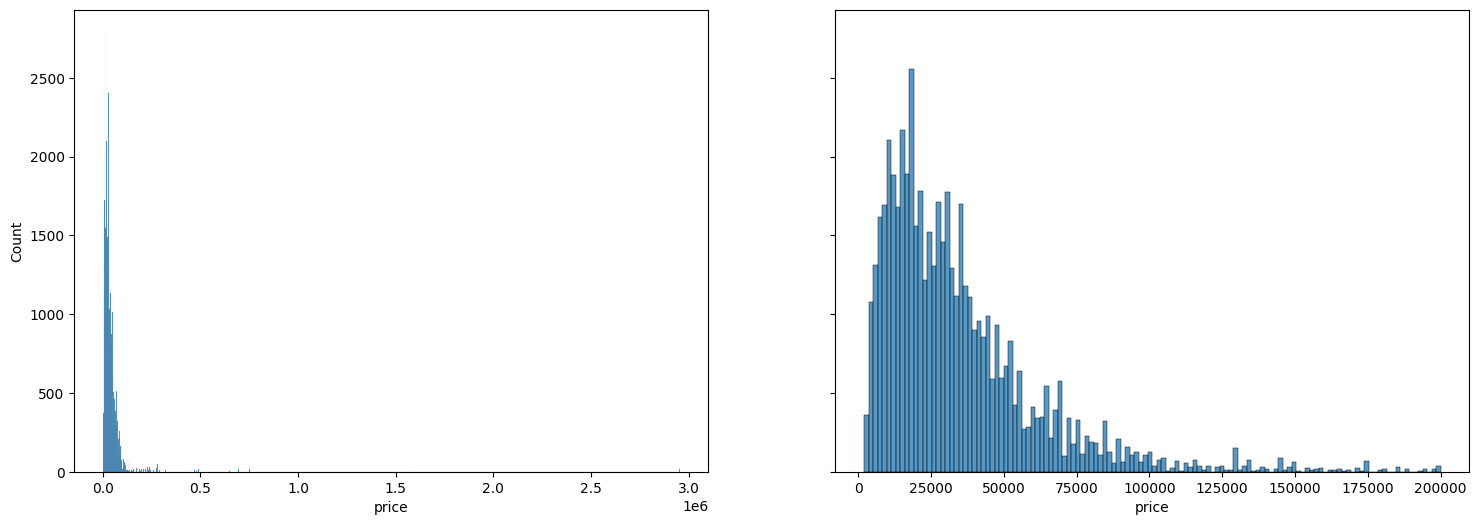

In [48]:
fig,axes=plt.subplots(1,2,figsize=(18,6),sharey=True)
sns.histplot(df['price'],ax=axes[0])
sns.histplot(df[df['price']<=200000]['price'],ax=axes[1])
plt.show()

In [49]:
df.sort_values(['price'],ascending=False).head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,...,price,brand_country,brand_continent,fuel,horsepower,litres,cylinder,tsm,exterior_color,interior_color
39761,39761,Chevrolet,Suburban 1500 LTZ,2010,194000,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,...,2954083,United States,American,Gasoline,355.0,5.3,8.0,Automatic,Silver,Black
37341,37341,Porsche,911 Carrera 4S,2005,28500,Gasoline,355.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,...,2954083,Germany,Europe,Gasoline,355.0,3.8,6.0,Manual,Gray,Black


In [50]:
#finding outliers value
iqr=df['price'].describe()['75%']-df['price'].describe()['25%']
ub=df['price'].describe()['75%']+1.5*iqr
lb=df['price'].describe()['25%']-1.5*iqr
print(lb,ub)

-28750.0 89250.0


In [51]:
# we will be dropping rows of price > 80000
df=df[df['price']<=200000].copy().reset_index(drop=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

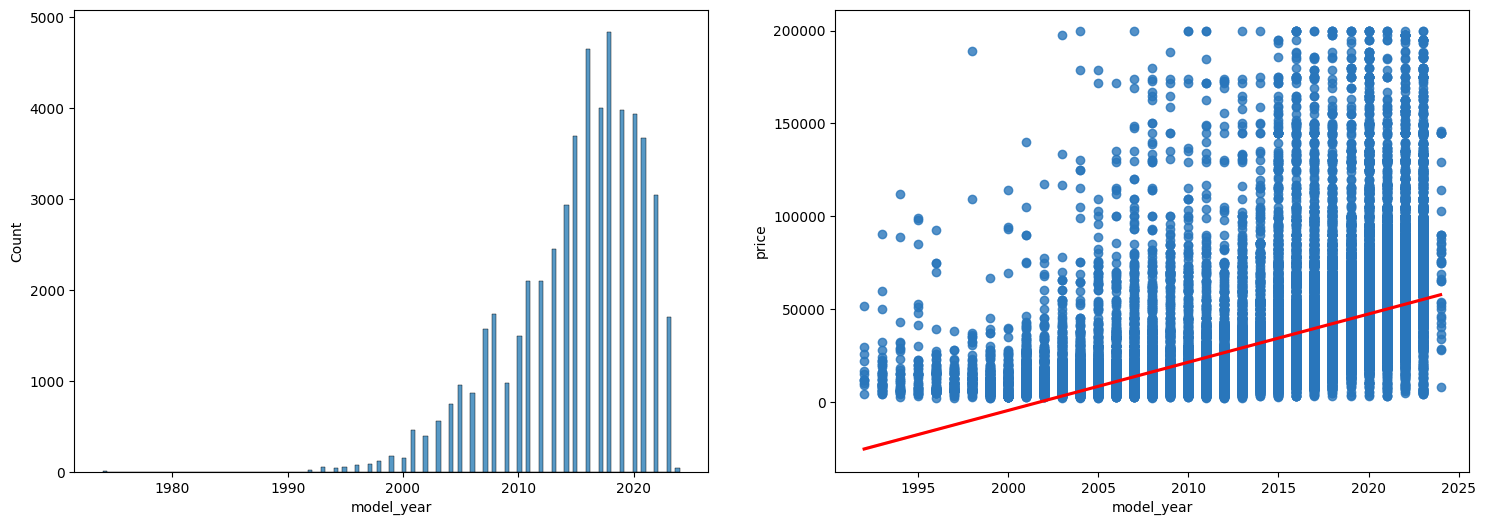

In [52]:
#finding correlation bw model year and price
fig,axes=plt.subplots(1,2,figsize=(18,6))
sns.histplot(df['model_year'],ax=axes[0])
sns.regplot(data=df[df['model_year']>=1990],x='model_year',y='price',color='red',scatter_kws = {'color': sns.xkcd_rgb['bluish']},ax=axes[1])
plt.plot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


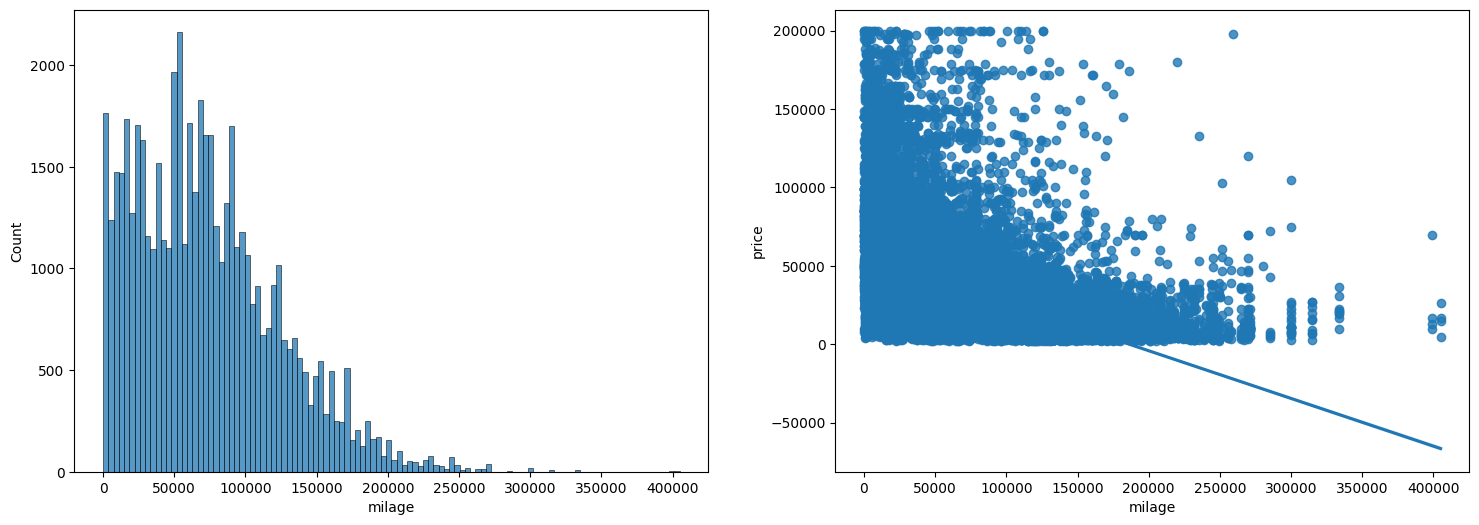

In [53]:
#correlation bw mileage and price
fig,axes=plt.subplots(1,2,figsize=(18,6))
sns.histplot(df['milage'],ax=axes[0])
sns.regplot(df,x='milage',y='price',ax=axes[1])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


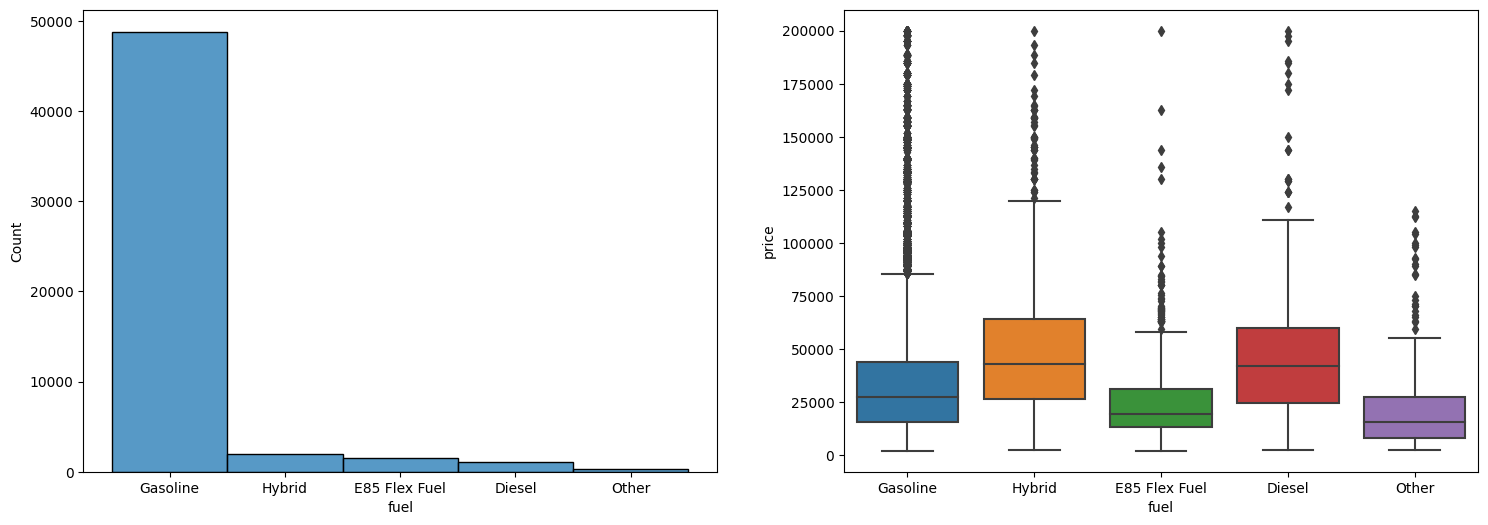

In [54]:
# we will look into fuel_type and its reln with price. since it has lot of outliers we will go for boxflot
fig,axes=plt.subplots(1,2,figsize=(18,6))
sns.histplot(df['fuel'],ax=axes[0])
sns.boxplot(df,x='fuel',y='price',ax=axes[1])
plt.show()

In [55]:
# we can see from gasoline cars are less pricey than hybrid,diesel

In [56]:
df['litres']=df['litres'].astype(float)

In [73]:
test['litres']=test['litres'].astype(float)

In [57]:
df['cylinder']

0        6.0
1        6.0
2        8.0
3        6.0
4        6.0
        ... 
53605    8.0
53606    4.0
53607    6.0
53608    6.0
53609    4.0
Name: cylinder, Length: 53610, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


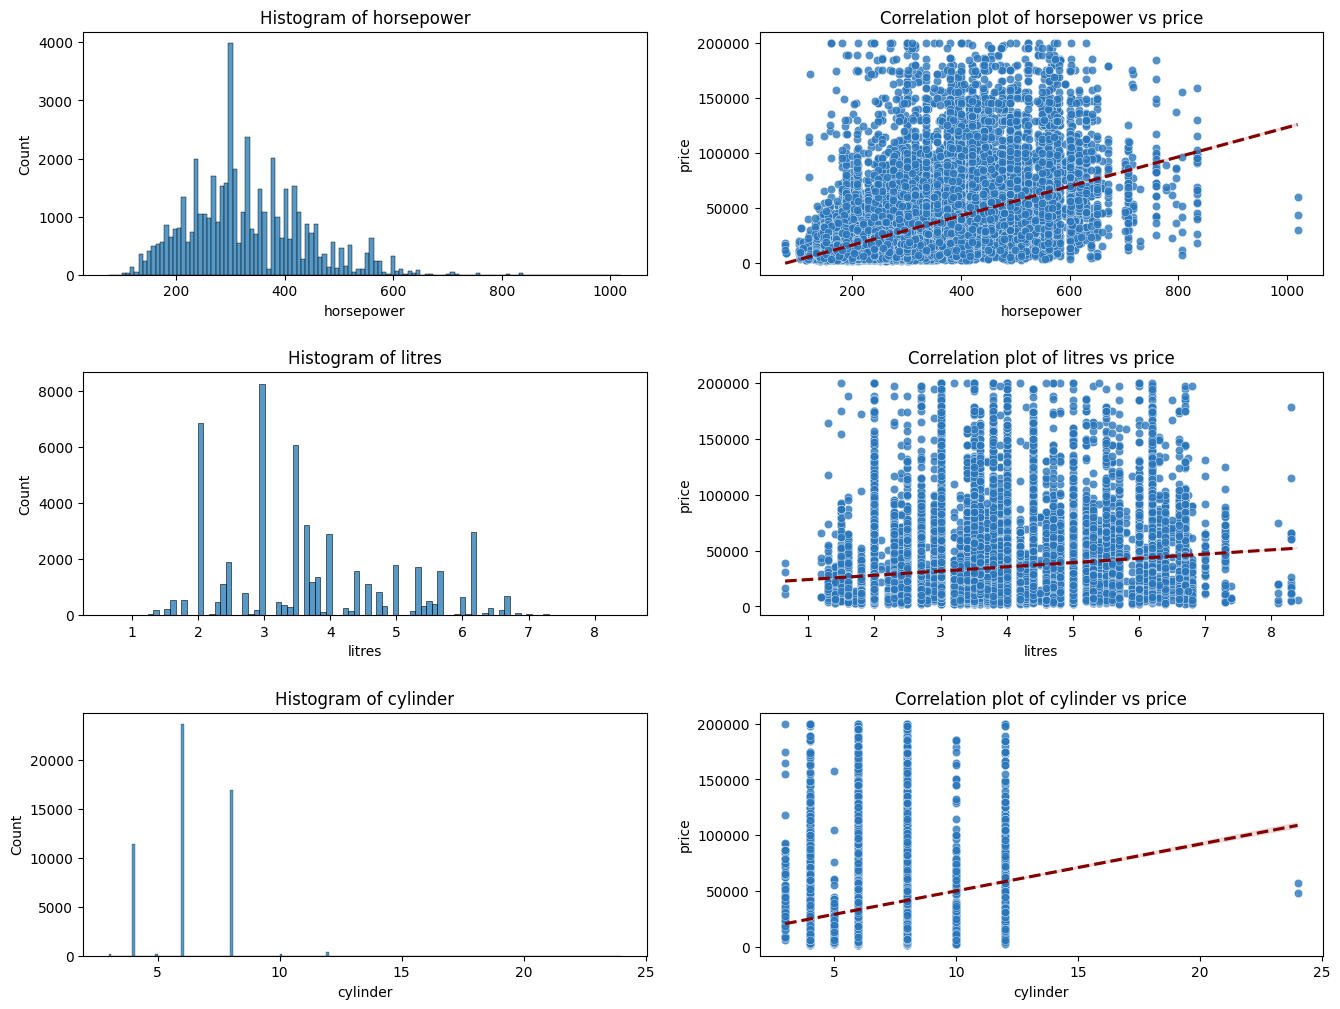

In [58]:
#now we will look into engines and its correlation with the price
fig,axes=plt.subplots(3,2,figsize=(16,12))
plt.subplots_adjust(hspace = 0.4)
engine_vars=['horsepower','litres','cylinder']
for e,var in enumerate(engine_vars):
    sns.histplot(df[var],ax=axes[e][0])
    sns.regplot(df,x=var,y='price',scatter_kws = {'color': sns.xkcd_rgb['bluish'], 'linewidth': 0.3, 'edgecolor': 'white'},
                line_kws = {'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'},ax=axes[e][1])
    axes[e][0].set_title(f'Histogram of {var}')
    axes[e][1].set_title(f'Correlation plot of {var} vs price')
    
plt.show()

In [59]:
#from the above we can see only horsepower shows a strong correlation with price

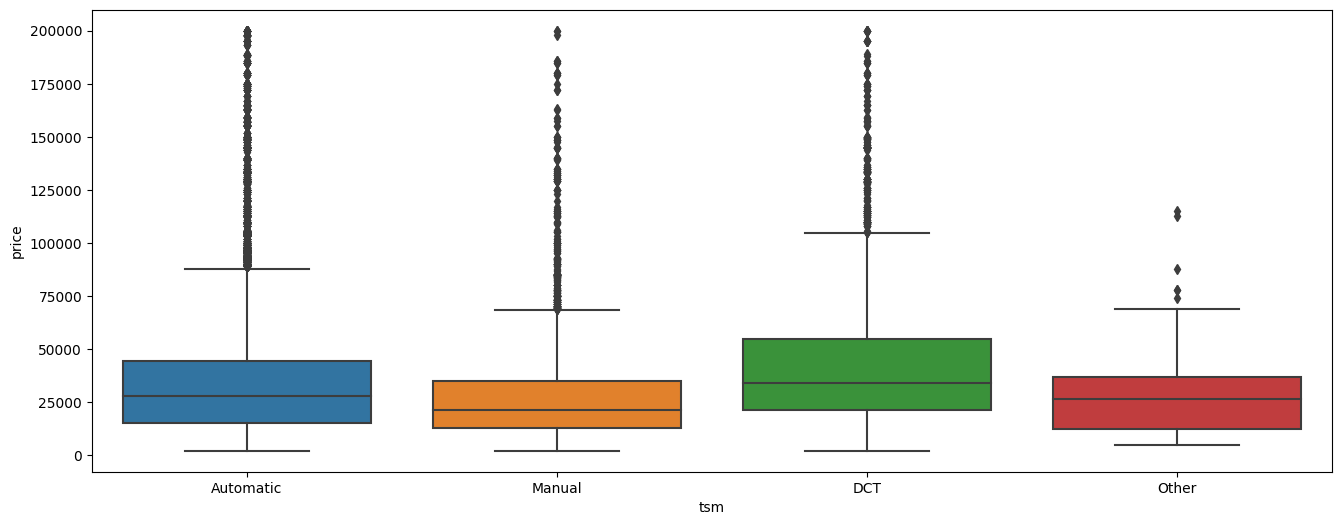

In [60]:
fig,axes=plt.subplots(1,1,figsize=(16,6))
sns.boxplot(df,x='tsm',y='price')
plt.show()

In [61]:
# we can see from the above plot tsm also doesnt have any type of correlation with price

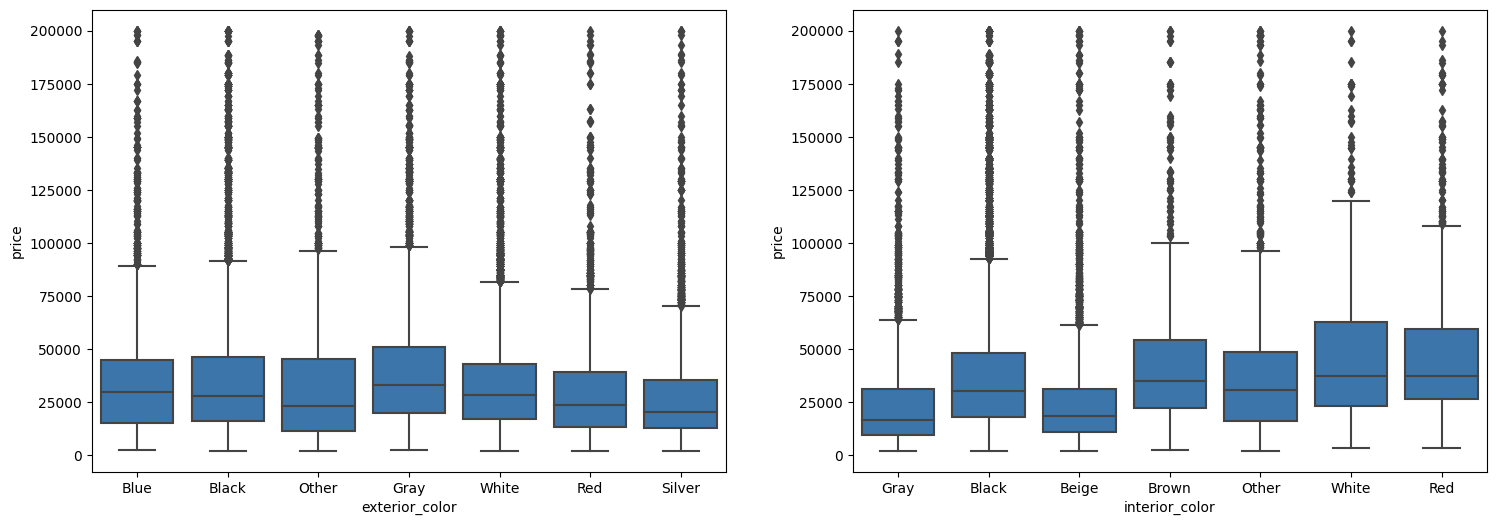

In [62]:
fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.boxplot(data = df, x = 'exterior_color', y = 'price', color = sns.xkcd_rgb['bluish'], ax = axes[0])
sns.boxplot(data = df, x = 'interior_color', y = 'price', color = sns.xkcd_rgb['bluish'], ax = axes[1])


plt.show()

In [63]:
#The color of the car seems to do not affect the price, although for cars with a white interior there is a higher price

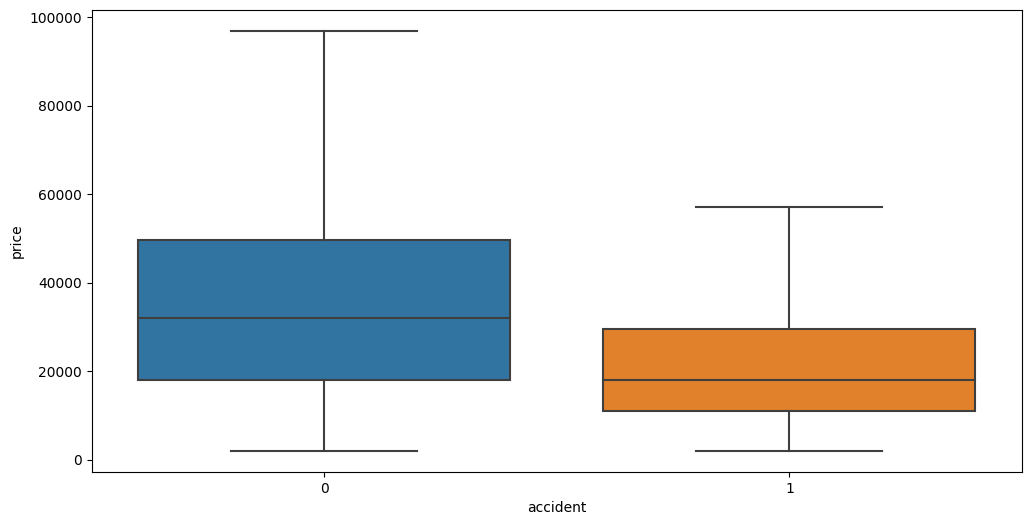

In [64]:
plt.figure(figsize = (12,6))

sns.boxplot(data = df, x = 'accident', y = 'price', showfliers = False)

plt.show()

In [65]:
#if a car suffers any forms of accident, price is less for the car, as we can see from the above plot too

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

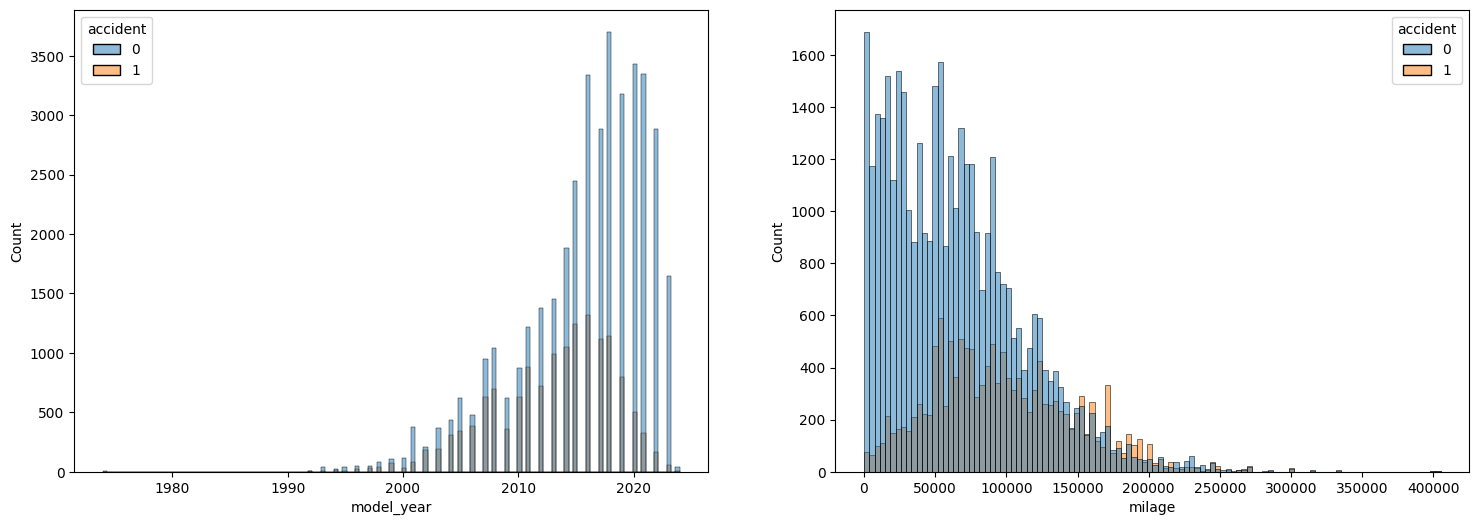

In [66]:
fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.histplot(data = df, x = 'model_year', hue = 'accident', ax = axes[0])
sns.histplot(data = df, x = 'milage', hue = 'accident', ax = axes[1])

plt.show()

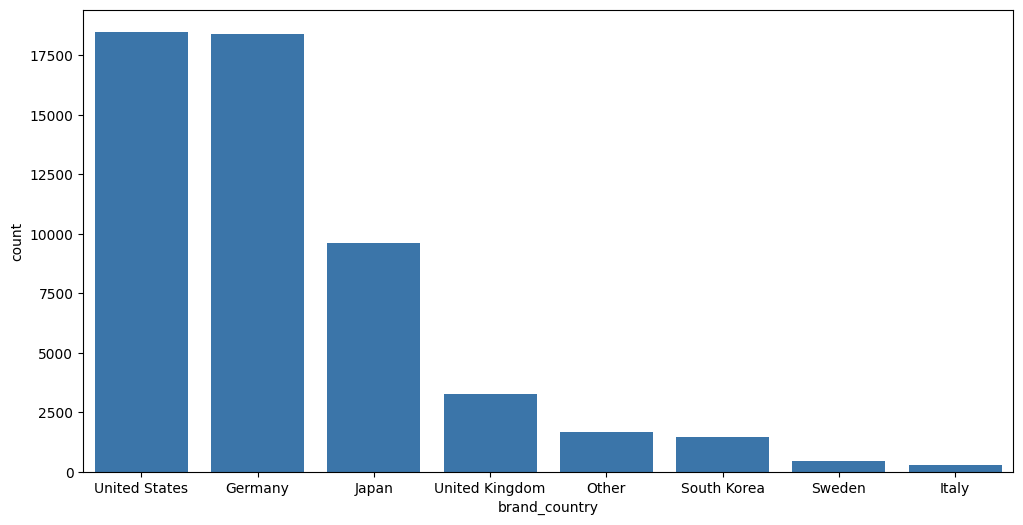

In [67]:
plt.figure(figsize = (12,6))

sns.barplot(data = df['brand_country'].value_counts().reset_index(), 
             x = 'brand_country', y = 'count', color = sns.xkcd_rgb['bluish'])

plt.show()

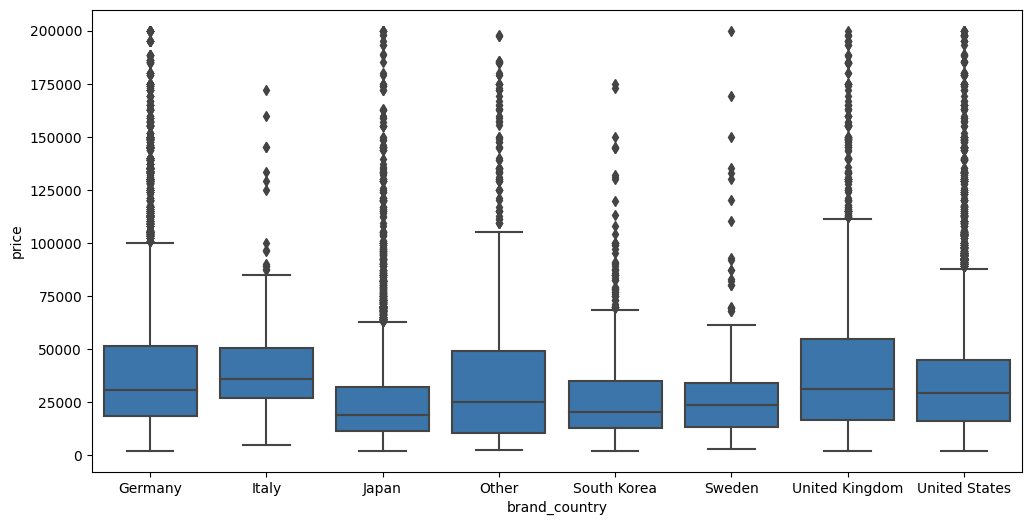

In [68]:
plt.figure(figsize = (12,6))

sns.boxplot(data = df, x = 'brand_country', y = 'price', color = sns.xkcd_rgb['bluish'], order = df.groupby(['brand_country'])['price'].mean().index.to_list())

plt.show()

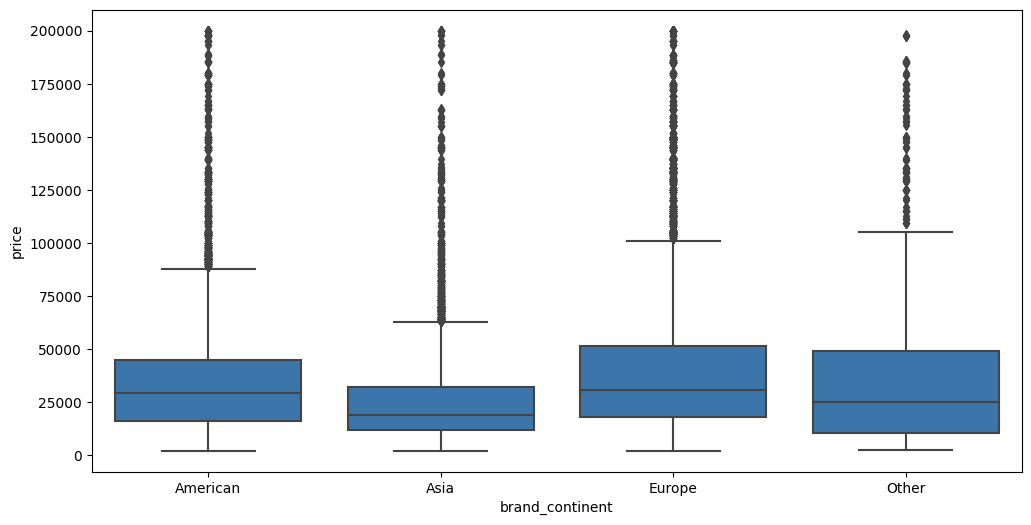

In [69]:
plt.figure(figsize = (12,6))

sns.boxplot(data = df, x = 'brand_continent', y = 'price', 
            color = sns.xkcd_rgb['bluish'], order = df.groupby(['brand_continent'])['price'].mean().index.to_list())

plt.show()

In [70]:
#The prices seem to vary depending on the continent of the brand. European countries have a greater mean price than the American and Asian ones

In [71]:
#we can see from the above plot recent models and low milage cars are prone to less accident hence higher price

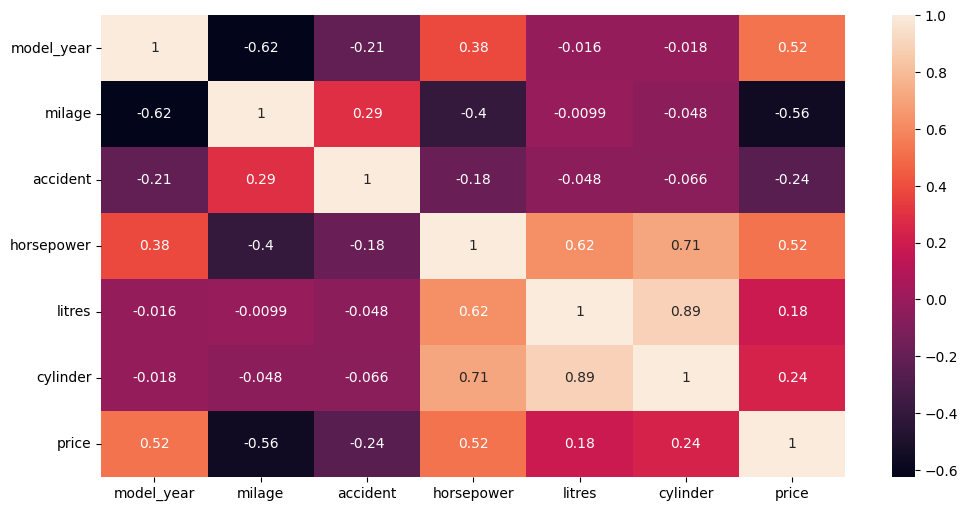

In [72]:
plt.figure(figsize = (12,6))

sns.heatmap(df[['model_year', 'milage', 'accident', 'horsepower', 'litres', 'cylinder' ,'price']].corr(), annot = True)

plt.show()

In [ ]:
# we can see horsepower have a positive correlation with the cylinder and litres which we will use to fill the na values
df = pd.merge(df, df.groupby(['litres'])['horsepower'].mean().reset_index().rename({'horsepower': 'hp_mean_litres'}, axis = 1), 'left', ['litres'])
df.loc[df['horsepower'].isnull() & df['hp_mean_litres'].notnull(), 'horsepower'] = round(df.loc[df['horsepower'].isnull() & df['hp_mean_litres'].notnull(), 'hp_mean_litres'])

In [74]:
# we can see horsepower have a positive correlation with the cylinder and litres which we will use to fill the na values
test = pd.merge(test, test.groupby(['litres'])['horsepower'].mean().reset_index().rename({'horsepower': 'hp_mean_litres'}, axis = 1), 'left', ['litres'])
test.loc[test['horsepower'].isnull() & test['hp_mean_litres'].notnull(), 'horsepower'] = round(test.loc[test['horsepower'].isnull() & test['hp_mean_litres'].notnull(), 'hp_mean_litres'])

In [75]:
df['horsepower'].isna().sum()

3865

In [76]:
#we still have 367 null horsepower values, which we will deal another method (by simply taking the mean)
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [77]:
test['horsepower'] = test['horsepower'].fillna(test['horsepower'].mean())

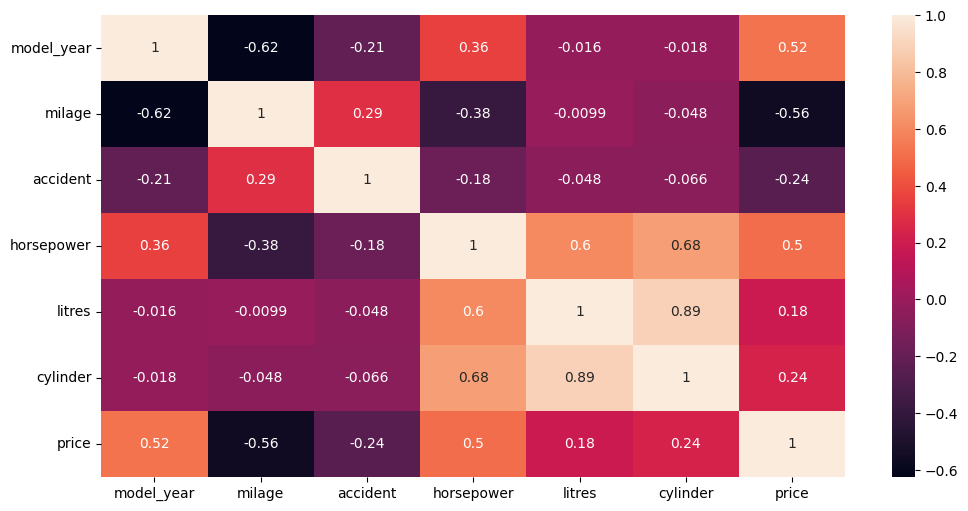

In [78]:
plt.figure(figsize = (12,6))

sns.heatmap(df[['model_year', 'milage', 'accident', 'horsepower', 'litres', 'cylinder' ,'price']].corr(), annot = True)

plt.show()

In [79]:
 # hence we can see model_year, horsepower significantly shows positive correlation whereas milage shows neg corr

In [80]:
df['cylinder']=df['cylinder'].fillna(df['cylinder'].mean())

Modelling and Evaluation

In [81]:
data_before_scaling = df.copy()
test_before_scaling=test.copy()

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

%matplotlib inline

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53610 entries, 0 to 53609
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               53610 non-null  int64  
 1   brand            53610 non-null  object 
 2   model            53610 non-null  object 
 3   model_year       53610 non-null  int64  
 4   milage           53610 non-null  int64  
 5   fuel_type        53610 non-null  object 
 6   engine           53610 non-null  object 
 7   transmission     53610 non-null  object 
 8   ext_col          53610 non-null  object 
 9   int_col          53610 non-null  object 
 10  accident         53610 non-null  int64  
 11  clean_title      53610 non-null  int64  
 12  price            53610 non-null  int64  
 13  brand_country    53610 non-null  object 
 14  brand_continent  53610 non-null  object 
 15  fuel             53610 non-null  object 
 16  horsepower       53610 non-null  float64
 17  litres      

In [88]:
#scaling the relevant numeric columns - model_year, milage,cylinder and horsepower
scaler = StandardScaler()
numeric_columns = ['model_year', 'milage', 'horsepower']
indexes = df.index.tolist()
X_num = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), index = indexes, columns = numeric_columns)

binary_columns = ['accident', 'brand_continent']
X_bin = pd.get_dummies(df[binary_columns], columns = ['brand_continent'], dtype = float)

X = pd.concat([X_num,X_bin], axis = 1)
y = df['price']

In [123]:
#scaling the relevant numeric columns - model_year, milage,cylinder and horsepower
scaler = StandardScaler()
numeric_columns = ['model_year', 'milage', 'horsepower']
indexes = test.index.tolist()
X_num = pd.DataFrame(scaler.fit_transform(test[numeric_columns]), index = indexes, columns = numeric_columns)

binary_columns = ['accident', 'brand_continent']
X_bin = pd.get_dummies(test[binary_columns], columns = ['brand_continent'], dtype = float)

X_test_final = pd.concat([X_num,X_bin], axis = 1)
# y = test['price']

In [93]:
X.isna().sum()

model_year                  0
milage                      0
horsepower                  0
accident                    0
brand_continent_American    0
brand_continent_Asia        0
brand_continent_Europe      0
brand_continent_Other       0
dtype: int64

In [94]:
X_test_final.isna().sum()

model_year                  0
milage                      0
horsepower                  0
accident                    0
brand_continent_American    0
brand_continent_Asia        0
brand_continent_Europe      0
brand_continent_Other       0
dtype: int64

In [95]:
# Traininabsg using base model - Linear and Polynomial Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
def training_metrics(regressor, X_train, y_train):
    train_preds = regressor.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    mae = mean_absolute_error(y_train, train_preds)
    score = regressor.score(X_train, y_train)
    
    print('Training set metrics')
    print('-'*10)
    print('Score: ' + str(score))
    print('RMSE: ' + str(rmse))
    print('MAE: ' + str(mae))
    
    print(" ")
    
    print('Cross Validation')
    print('-'*10)
    cv_scores = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv = 5)
    rmse_scores = np.sqrt(-cv_scores)
    print(rmse_scores)
    print(" ")
    print('Mean CV score: ' + str(rmse_scores.mean()))
    print('Standard deviation: ' + str(rmse_scores.std()))

In [97]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [98]:
training_metrics(lin_reg, X_train, y_train)

Training set metrics
----------
Score: 0.4391833111981347
RMSE: 20720.94299004039
MAE: 13144.060187190667
 
Cross Validation
----------
[20179.48666692 21357.69941541 20831.76356897 20622.06564856
 20633.90423095]
 
Mean CV score: 20724.98390616337
Standard deviation: 381.62435064986835


In [99]:
#Polynomial Regression
poly_features = PolynomialFeatures(degree =4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [100]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

LinearRegression()

In [101]:
training_metrics(poly_reg, X_poly, y_train)

Training set metrics
----------
Score: 0.5149847849070426
RMSE: 19269.77895160837
MAE: 11338.59854346277
 
Cross Validation
----------
[18933.30293764 19973.93811878 19660.51027899 19329.93332893
 19148.98354062]
 
Mean CV score: 19409.333640990946
Standard deviation: 369.47523182436674


In [102]:
#SVM
# svm = SVR(kernel = 'rbf', C= 100)
# svm.fit(X_train, y_train.ravel())
# training_metrics(svm, X_train, y_train.ravel())

In [103]:
#Decision Tree
tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X_train, y_train)
training_metrics(tree, X_train, y_train)

Training set metrics
----------
Score: 0.49123378651781746
RMSE: 19735.956657488514
MAE: 11757.443684047903
 
Cross Validation
----------
[19336.65616222 20565.37928995 20152.62733962 19850.46706225
 19579.20502394]
 
Mean CV score: 19896.866975595185
Standard deviation: 431.0963468102147


In [104]:
sorted(zip(tree.feature_importances_,numeric_columns+X_bin.columns.tolist()), reverse = True)

[(0.6443829695423953, 'milage'),
 (0.1729832731512011, 'model_year'),
 (0.17104777929127327, 'horsepower'),
 (0.011585978015130498, 'brand_continent_American'),
 (0.0, 'brand_continent_Other'),
 (0.0, 'brand_continent_Europe'),
 (0.0, 'brand_continent_Asia'),
 (0.0, 'accident')]

In [105]:
#Random Forest
forest = RandomForestRegressor(max_depth = 5, n_jobs = -1)
forest.fit(X_train, y_train.ravel())
training_metrics(forest, X_train, y_train.ravel())

/tmp/ipykernel_64/2664168689.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  forest.fit(X_train, y_train.ravel())
/tmp/ipykernel_64/2664168689.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  training_metrics(forest, X_train, y_train.ravel())


Training set metrics
----------
Score: 0.5036526701309783
RMSE: 19493.593090174916
MAE: 11543.962493182345
 
Cross Validation
----------
[19062.43303773 20270.92278498 19884.19932393 19581.56667244
 19355.19717185]
 
Mean CV score: 19630.863798183425
Standard deviation: 418.4232833143975


In [106]:
sorted(zip(forest.feature_importances_,numeric_columns+X_bin.columns.tolist()), reverse = True)

[(0.6390957568580174, 'milage'),
 (0.1748634748926201, 'model_year'),
 (0.171597501398065, 'horsepower'),
 (0.010193300174937284, 'brand_continent_American'),
 (0.002729670045102292, 'brand_continent_Europe'),
 (0.0012005510328345738, 'brand_continent_Asia'),
 (0.00031974559842315697, 'accident'),
 (0.0, 'brand_continent_Other')]

Baseline models give us a decent result. We can use this to compare it with the performance of other models. Given that the price has a high coefficient of variation (standard deviation is very close to the mean), the RMSE values are "ok" for now.

Decision Tree and Random Forest seem to have better performance, and it is interesting that the polynomial regression gives a CV mean score as good as RF! At first glance, could be a very good model if we wanted simplicity over a high computing model.

The features that hold the greater importance (on the tree-based algorithms) are the milage and horsepower, unlike the categorical and binary features.

In [107]:
print('Coefficient of variation of price: ' + str((df['price'].std()/df['price'].mean())))
print('Mean price: ' + str(df['price'].describe()['mean']))

Coefficient of variation of price: 0.8009475252488294
Mean price: 34407.623092706584


/tmp/ipykernel_64/2973205356.py:21: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  sns.scatterplot(x = y_train.ravel(), y = y_pred.ravel(), ax = ax)
/tmp/ipykernel_64/2973205356.py:21: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  sns.scatterplot(x = y_train.ravel(), y = y_pred.ravel(), ax = ax)
/tmp/ipykernel_64/2973205356.py:21: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  sns.scatterplot(x = y_train.ravel(), y = y_pred.ravel(), ax = ax)
/tmp/ipykernel_64/2973205356.py:21: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array i

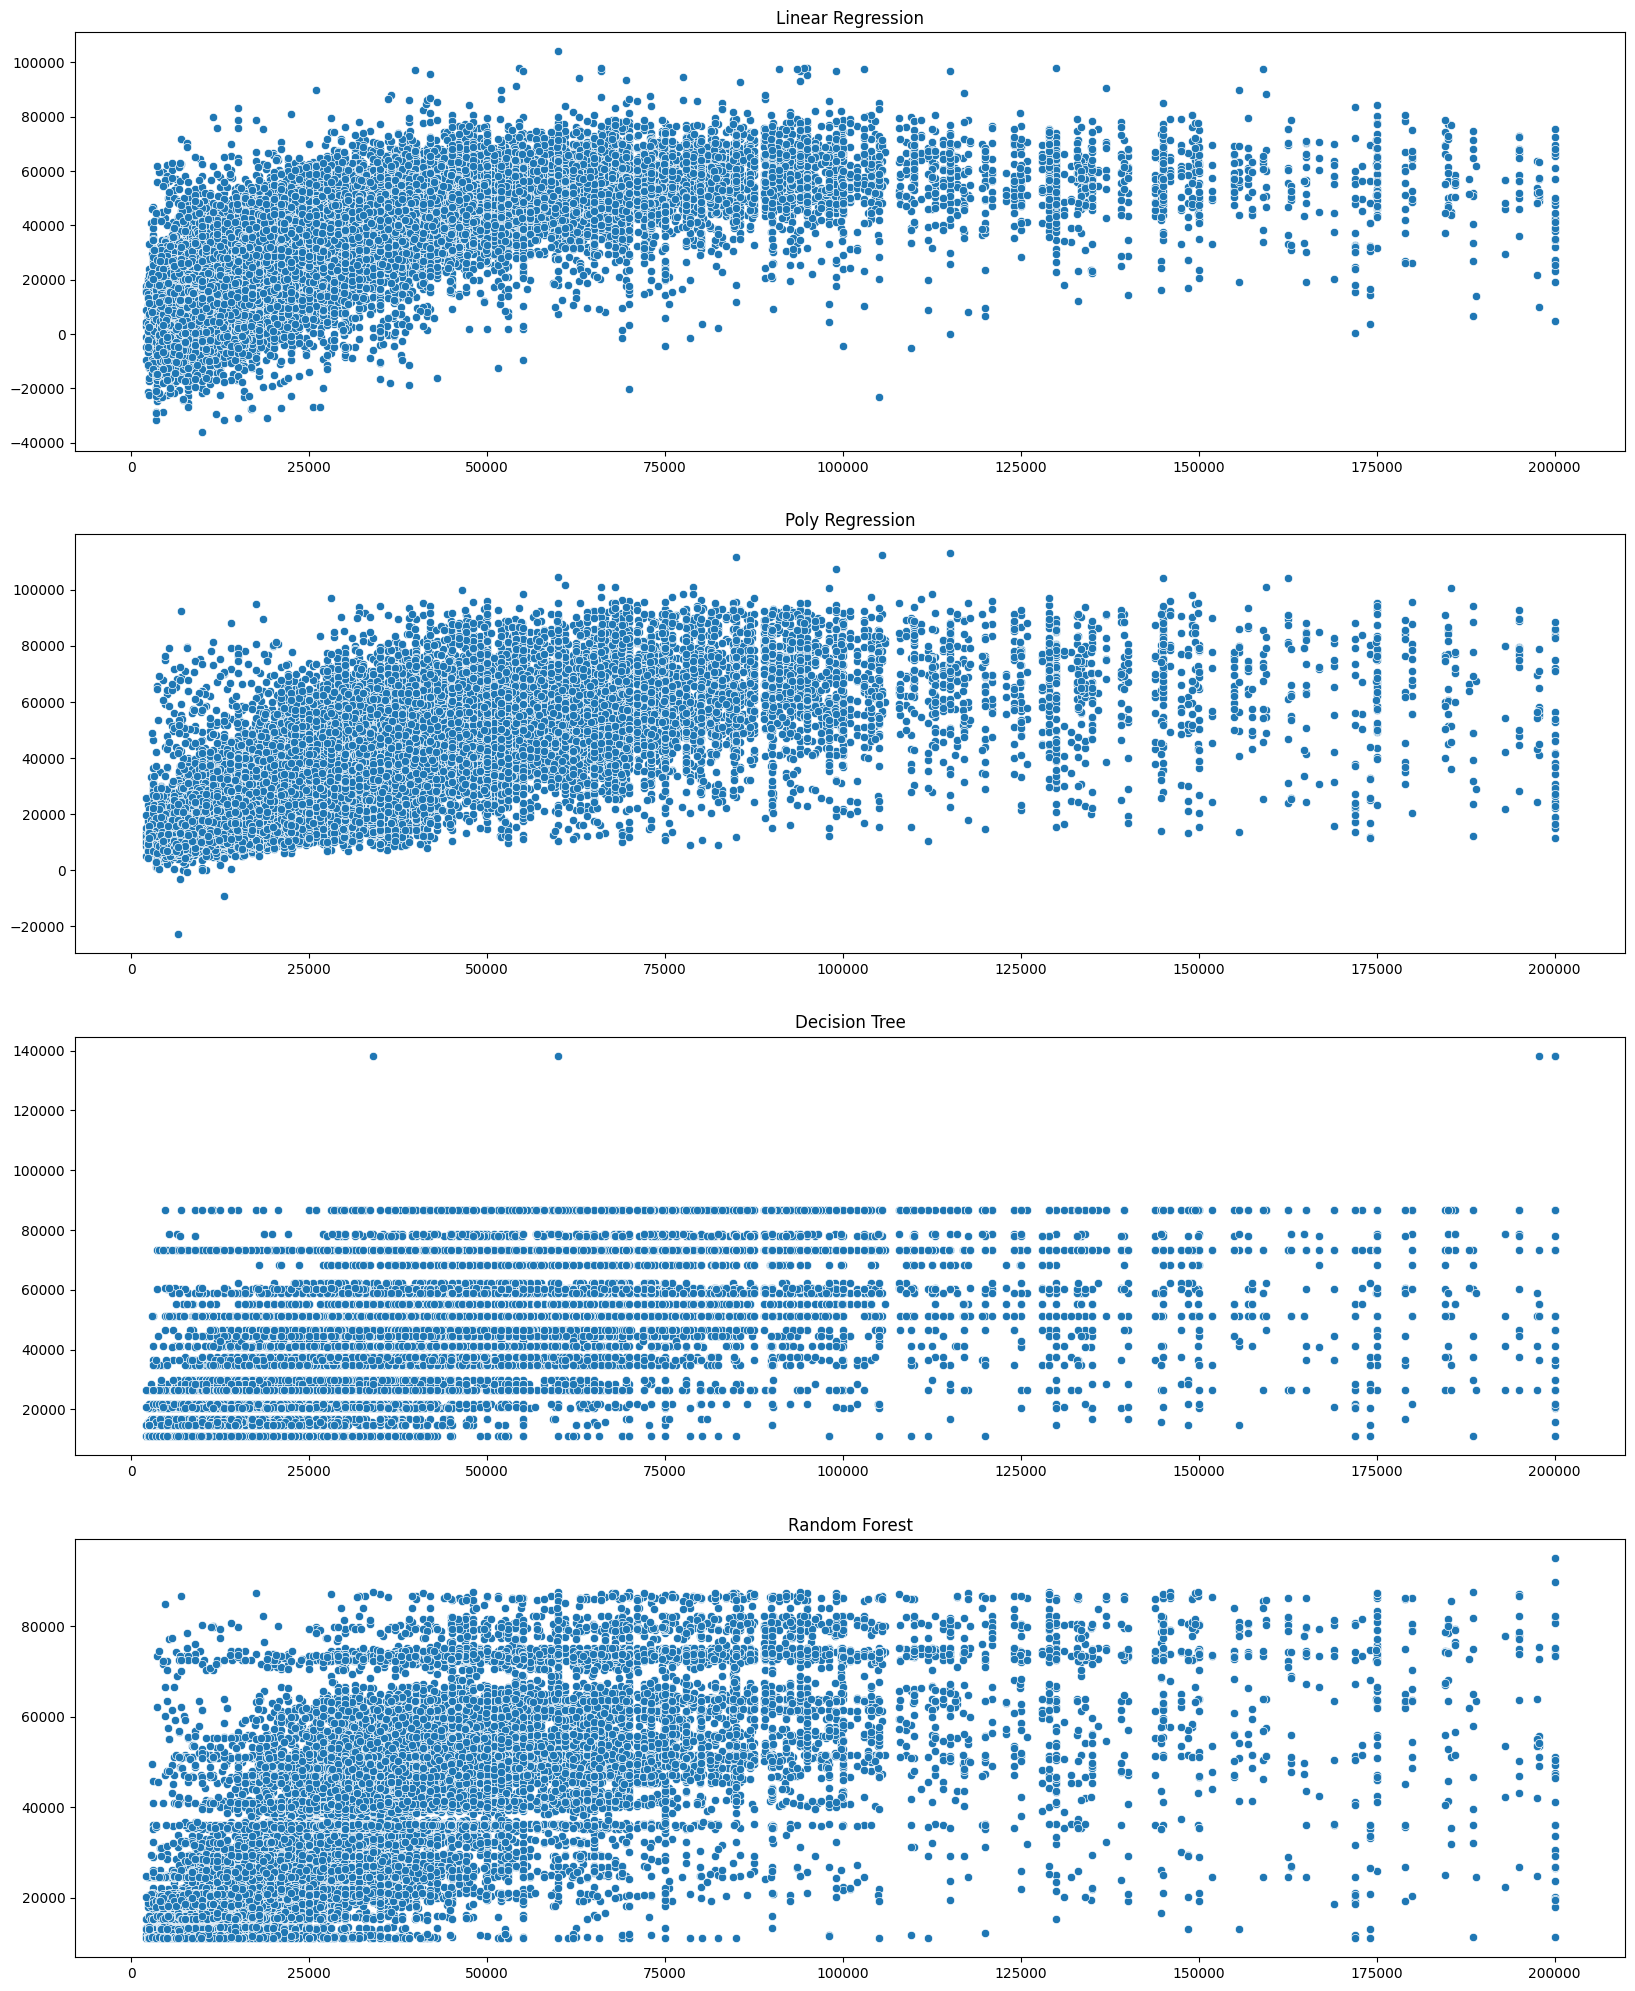

In [108]:
models = [lin_reg, poly_reg, tree, forest]    
names = ['Linear Regression', 'Poly Regression', 'Decision Tree', 'Random Forest']

fig, axes = plt.subplots(4,1, figsize = (20,25))

plt.subplots_adjust(hspace = 0.2)

for e, ax in enumerate(axes):
    
    #print('Name: ' + str(names[e]))
    
    model = models[e]
    
    if e != 1:  
        #print('ao')
        y_pred = model.predict(X_train)
    else:
        #print('eo')
        y_pred = model.predict(X_poly)
    
    sns.scatterplot(x = y_train.ravel(), y = y_pred.ravel(), ax = ax)
    ax.set_title(names[e])

plt.show()

ys = pd.DataFrame(zip(y_train.values,y_pred), index = y_train.index.tolist(), columns = ['y_train', 'y_pred'])

In [109]:
# we can see there are errors beyond 100000
# linear reg, polyno reg tends to perform better

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


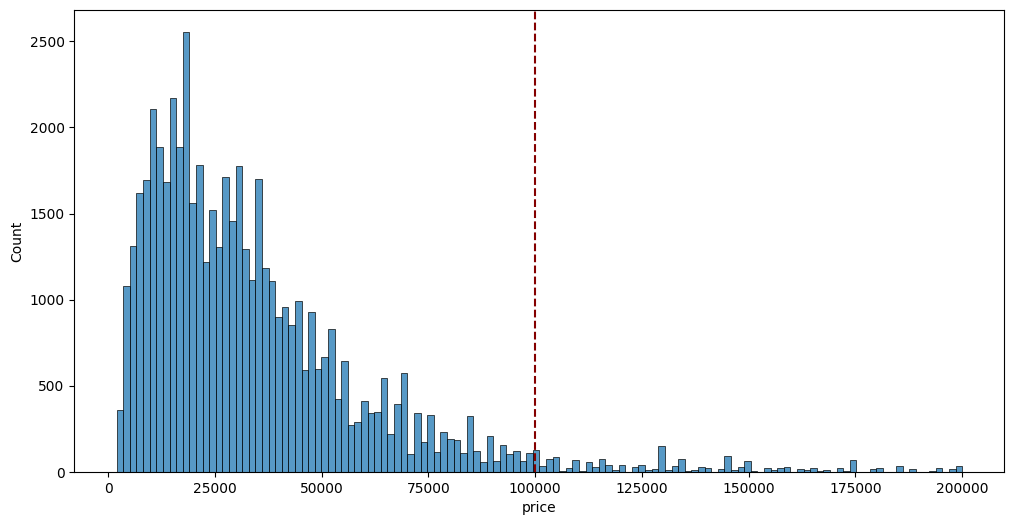

In [110]:
plt.figure(figsize = (12,6))

sns.histplot(df['price'])
plt.axvline(x=100000, linestyle='--', label='onset', color = sns.xkcd_rgb['dark red'])

plt.show()

In [111]:
print('Three sigma limit: ' + str((df['price'].mean()+df['price'].std()*3)))
print('Percentage of data: ' + str((df[df['price']<=(df['price'].mean()+df['price'].std()*3)].shape[0]/df.shape[0])))

Three sigma limit: 117083.72479010001
Percentage of data: 0.9799664241745943


In [112]:
X_train_inv = scaler.inverse_transform(X_train.iloc[:,:3])
index_train = X_train.index.tolist()
columns_train = X_train.iloc[:,:3].columns.tolist()

X_train_inv = pd.DataFrame(X_train_inv, index = index_train, columns = columns_train)
X_train_inv = pd.concat([X_train_inv,X_train.iloc[:,3:], ys], axis = 1)

out_df = X_train_inv[X_train_inv['y_train'] >= 117083].copy()

In [113]:
out_df['absolute error'] = abs(out_df['y_train']-out_df['y_pred'])
out_df['squared error'] = (out_df['y_train']-out_df['y_pred'])**2

In [114]:
np.sqrt(out_df['squared error'].mean()),out_df['absolute error'].mean()

(93084.24755622548, 87535.71308456764)

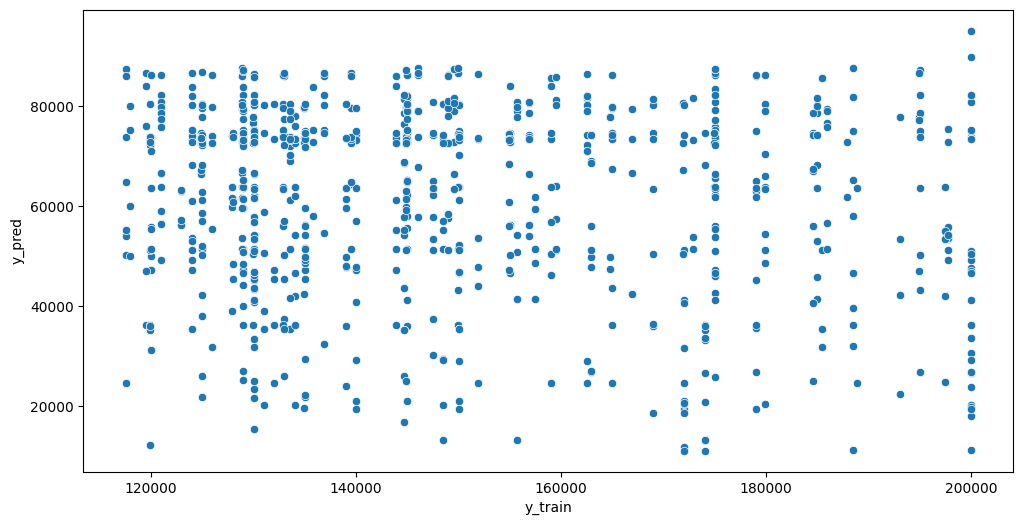

In [115]:
plt.figure(figsize = (12,6))

sns.scatterplot(data = out_df, x = 'y_train', y ='y_pred')

plt.show()

If this does not ring a bell, we can see that the majority of these vehicles are made by luxury car brands.

This maybe points that our model could have better results with standard vehicles and not necessarily luxury ones. In this sense, maybe there are other features that explain better the behaviour of these types of cars and we are not taking into consideration, for example, the materials used inside and outside of the car (high quality leather inside, resistant metal outside, better tires, etc.)

There's also the case of what a luxury car is trying to sell. For example, as the years pass this type of cars becomes more exclusive, because there are fewer models for sale in the world. Maybe the car's milage doesn't affect much because it maintains its value over the years. Also, if it has more or less horsepower doesn't matter, maybe it is more important the image and the cultural relevance of having this type of car which makes them so expensive.

In [116]:
df.loc[out_df.index, 'brand'].value_counts()

brand
Porsche          185
Mercedes-Benz    147
BMW              111
Ford              63
Land              57
Chevrolet         55
Bentley           29
Audi              24
Lexus             22
Toyota            19
Nissan            18
Lamborghini       17
Cadillac          15
Dodge             12
Rolls-Royce       11
GMC               10
INFINITI           9
McLaren            8
Jeep               8
Maserati           7
Volvo              7
Ferrari            7
Aston              6
RAM                6
Jaguar             5
Kia                5
Acura              5
Lincoln            5
Mazda              4
Genesis            3
Rivian             2
Tesla              1
Alfa               1
Chrysler           1
Volkswagen         1
Buick              1
Scion              1
Name: count, dtype: int64

In [117]:
# In this case we will use only the best three models previously evaluated, but we filter the outliers composed of expensive cars through our three sigma limit.

In [118]:
limit = data_before_scaling['price'].mean() + data_before_scaling['price'].std()*3
df_new = data_before_scaling[data_before_scaling['price'] <= limit].copy()

In [119]:
scaler = StandardScaler()
numeric_columns = ['model_year', 'milage', 'horsepower']
indexes = df_new.index.tolist()
X_num = pd.DataFrame(scaler.fit_transform(df_new[numeric_columns]), index = indexes, columns = numeric_columns)
binary_columns = ['accident', 'brand_continent']
X_bin = pd.get_dummies(df_new[binary_columns], columns = ['brand_continent'], dtype = float)

X = pd.concat([X_num,X_bin], axis = 1)
#y = np.array(df['price']).reshape(-1,1)
y = df_new['price']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
X_train.isna().sum()

model_year                  0
milage                      0
horsepower                  0
accident                    0
brand_continent_American    0
brand_continent_Asia        0
brand_continent_Europe      0
brand_continent_Other       0
dtype: int64

In [125]:
X_test.isna().sum()

model_year                  0
milage                      0
horsepower                  0
accident                    0
brand_continent_American    0
brand_continent_Asia        0
brand_continent_Europe      0
brand_continent_Other       0
dtype: int64

In [126]:
#Polynomial Regression
poly_features = PolynomialFeatures(degree = 4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

training_metrics(poly_reg, X_poly, y_train)

Training set metrics
----------
Score: 0.6084401367010973
RMSE: 13787.130600616278
MAE: 9408.105703363866
 
Cross Validation
----------
[13911.71614766 13775.08541065 13813.27373127 13957.85562924
 14245.38463949]
 
Mean CV score: 13940.663111661052
Standard deviation: 165.91127039390136


In [127]:
#Decision Tree
tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X_train, y_train)

training_metrics(tree, X_train, y_train)

Training set metrics
----------
Score: 0.5815556436481603
RMSE: 14252.585757533494
MAE: 9773.27547573585
 
Cross Validation
----------
[14301.15491049 14197.88120371 14219.07679639 14520.04697115
 14420.43642866]
 
Mean CV score: 14331.719262079296
Standard deviation: 122.37090518983813


In [128]:
#Random Forest 
forest = RandomForestRegressor(max_depth = 5, n_jobs = -1)
forest.fit(X_train, y_train.ravel())

training_metrics(forest, X_train, y_train.ravel())

/tmp/ipykernel_64/2988724628.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  forest.fit(X_train, y_train.ravel())
/tmp/ipykernel_64/2988724628.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  training_metrics(forest, X_train, y_train.ravel())


Training set metrics
----------
Score: 0.5974661781119699
RMSE: 13978.996423989152
MAE: 9545.652771112815
 
Cross Validation
----------
[14029.90858303 13948.22064889 13964.71820436 14230.23403821
 14148.42690401]
 
Mean CV score: 14064.301675697516
Standard deviation: 108.79812529609183


In [ ]:
#GRID SEARCH
#Random Forest

param_grid = {'n_estimators': [5,10,100,500], 'max_features': [2,4,6,'auto'], 'max_depth': [4,8,12]}

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, verbose = 10, n_jobs = -1)

grid_search.fit(X_train, y_train.ravel())

print(grid_search.best_params_)

forest = RandomForestRegressor(max_depth = 12, max_features = 2, n_estimators = 500, n_jobs = -1)
forest.fit(X_train, y_train.ravel())

training_metrics(forest, X_train, y_train.ravel())

In [ ]:
#Decision Tree

param_grid = {"splitter":["best","random"],
            "max_depth" : [1,5,7,10],
           "min_samples_leaf":[1,5,7,10],
           "max_features":["auto",2,4,None],}

tree_reg = DecisionTreeRegressor()

grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, verbose = 10, n_jobs = -1)

grid_search.fit(X_train, y_train.ravel())

print(grid_search.best_params_)

tree = DecisionTreeRegressor(max_depth = 10, max_features = 'auto', min_samples_leaf= 10, splitter = 'best')
tree.fit(X_train, y_train)
training_metrics(tree, X_train, y_train)

In [129]:
#Results
def test_metrics(y_pred, y_test):
   
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    score = r2_score(y_test, y_pred)
    
    index_test = y_test.index.tolist()
    
    df_ys = pd.DataFrame(zip(y_pred, y_test.values), index = index_test, columns = ['y_pred', 'y_test'])
    
    return score, rmse, mae, df_ys

In [130]:
models_test = [poly_reg, forest, tree]
names_test = ['Poly Regression', 'Decision Tree', 'Random Forest']

result_df = pd.DataFrame(columns = ['Model', 'R2 Score', 'RMSE', 'MAE'])
y_dfs = []

for e, model in enumerate(models_test):
    
    name = names_test[e]
    if e==0:
        y_pred_test = model.predict(poly_features.fit_transform(X_test))
    else:
        y_pred_test = model.predict(X_test)
        
    r2score, rmse, mae, df_ys = test_metrics(y_pred_test, y_test)
    
    y_dfs.append(df_ys)
    
    result_df.loc[len(result_df)] = [name, r2score, rmse, mae]

In [131]:
result_df

,Model,R2 Score,RMSE,MAE
0,Poly Regression,0.611549,13819.520476,9496.036859
1,Decision Tree,0.600379,14016.809197,9715.269266
2,Random Forest,0.584621,14290.483977,9936.950802


In [133]:
## preparing the submission file
## from above we can see poly regression gave the best result
y_pred_test_final = poly_reg.predict(poly_features.fit_transform(X_test_final))

In [135]:
price=y_pred_test_final

In [136]:
X_test_final['price']=price

In [141]:
X_test_final

,model_year,milage,horsepower,accident,brand_continent_American,brand_continent_Asia,brand_continent_Europe,brand_continent_Other,price
0,-0.190357,0.010268,-0.267572,0,0.0,0.0,1.0,0.0,23764.452148
1,-0.011442,1.095406,-0.518998,0,0.0,1.0,0.0,0.0,17769.002930
2,-0.011442,-0.404152,-0.835609,0,0.0,0.0,1.0,0.0,25055.194336
3,0.525302,-0.847479,1.743838,0,0.0,0.0,1.0,0.0,58315.694336
4,0.883131,0.345479,0.039727,0,0.0,0.0,1.0,0.0,35360.350586
...,...,...,...,...,...,...,...,...,...
36178,0.704216,-1.340437,0.831254,0,1.0,0.0,0.0,0.0,50336.319336
36179,-1.979503,2.218719,-0.332756,0,1.0,0.0,0.0,0.0,11339.444336
36180,-0.727101,0.858156,-1.850626,0,0.0,1.0,0.0,0.0,12303.319336
36181,0.704216,-0.660155,1.110617,0,1.0,0.0,0.0,0.0,46837.381836


In [143]:
sub=pd.read_csv('/kaggle/input/kagglexfellowship/kagglex-cohort4/sample_submission.csv')

In [146]:
final_sub=pd.concat([sub['id'],X_test_final['price']],axis=1).set_index('id')

In [147]:
final_sub.head()

,price
id,
54273,23764.452148
54274,17769.002930
54275,25055.194336
54276,58315.694336
54277,35360.350586


In [148]:
final_sub.to_csv('final_submission.csv')